In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load the dataset
dataset_path = '/content/drive/MyDrive/dataset/german_credit_data.csv'
data = pd.read_csv(dataset_path)


Mounted at /content/drive


In [ ]:
data.head()


,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [ ]:
# Data Preprocessing
data.drop('Unnamed: 0', axis=1, inplace=True)



In [ ]:
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [ ]:
# Handling missing values
data.fillna(method='ffill', inplace=True)



In [ ]:
# Add a new column 'Risk' with initial value 'Good'
data['Risk'] = 'Good'

In [ ]:
# Assign 'Bad' or 'Good' to 'Risk' column based on the specified conditions
data.loc[(data['Age'] < 17) | (data['Age'] > 60), 'Risk'] = 'Bad'
data.loc[(data['Age'] >= 60) & ((data['Saving accounts'] == 'little') | (data['Checking account'] == 'little')) & (data['Duration'] > 40), 'Risk'] = 'Bad'
data.loc[(data['Age'] == 60) & ((data['Saving accounts'] == 'little') | (data['Saving accounts'] == 'moderate')) & (data['Duration'] < 5) & (data['Credit amount'] < 900), 'Risk'] = 'Good'
data.loc[(data['Saving accounts'] == 'moderate') & (data['Credit amount'] > 900) & (data['Credit amount'] < 1500) & (data['Duration'] == 12), 'Risk'] = 'Good'
data.loc[(data['Saving accounts'] == 'little') & (data['Credit amount'] > 1200), 'Risk'] = 'Bad'
data.loc[(data['Housing'] == 'own') & (data['Credit amount'] < 5000) & (data['Saving accounts'] != 'little'), 'Risk'] = 'Good'



In [ ]:
# Convert categorical variables to numerical using one-hot encoding
categorical_cols = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=False)


In [ ]:
data.columns

Index(['Age', 'Job', 'Credit amount', 'Duration', 'Risk', 'Sex_female',
       'Sex_male', 'Housing_free', 'Housing_own', 'Housing_rent',
       'Saving accounts_little', 'Saving accounts_moderate',
       'Saving accounts_quite rich', 'Saving accounts_rich',
       'Checking account_little', 'Checking account_moderate',
       'Checking account_rich', 'Purpose_business', 'Purpose_car',
       'Purpose_domestic appliances', 'Purpose_education',
       'Purpose_furniture/equipment', 'Purpose_radio/TV', 'Purpose_repairs',
       'Purpose_vacation/others'],
      dtype='object')

In [ ]:
# Split the data into input features (X) and target variable (y)
X = data.drop('Risk', axis=1)
y = data['Risk']


<Axes: xlabel='Risk', ylabel='count'>

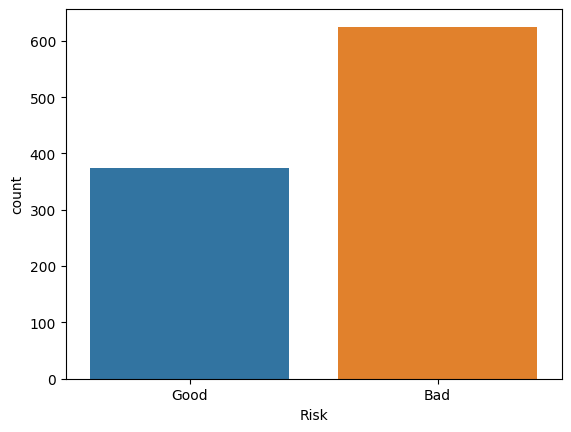

In [ ]:
# Exploratory Data Analysis (EDA)
sns.countplot(x='Risk', data=data)  # Distribution of Risk



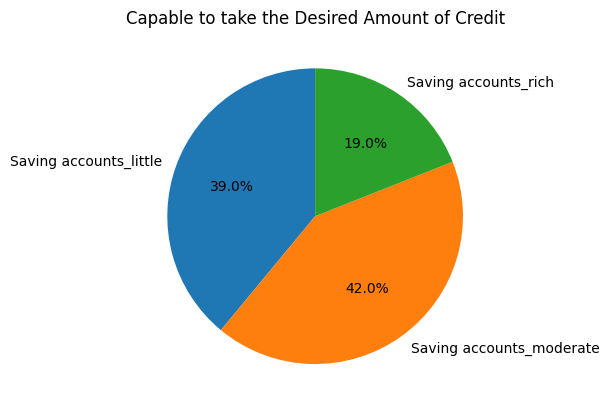

In [ ]:
import matplotlib.pyplot as plt

# Filter the data for 'Good' risk
good_risk_data = data[data['Risk'] == 'Good']

# Count the occurrences of each 'Saving accounts' category for 'Good' risk
saving_accounts_count = good_risk_data['Saving accounts_little'].sum(), good_risk_data['Saving accounts_moderate'].sum(), good_risk_data['Saving accounts_rich'].sum()

# Create labels for the pie chart
labels = ['Saving accounts_little', 'Saving accounts_moderate', 'Saving accounts_rich']

# Create values for the pie chart
values = saving_accounts_count

# Create a pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)

# Add a title to the pie chart
plt.title('Capable to take the Desired Amount of Credit')

# Display the pie chart
plt.show()


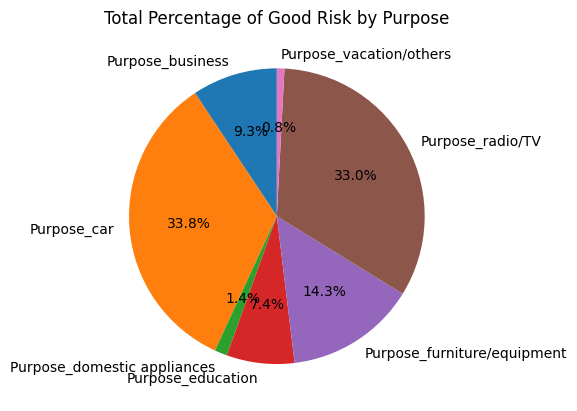

In [ ]:
import matplotlib.pyplot as plt

# Filter the data for 'Good' risk
good_risk_data = data[data['Risk'] == 'Good']

# Calculate the total count for each purpose
grouped_data = good_risk_data[['Purpose_business', 'Purpose_car', 'Purpose_domestic appliances',
                              'Purpose_education', 'Purpose_furniture/equipment', 'Purpose_radio/TV',
                              'Purpose_vacation/others']].sum()

# Calculate the percentage for each purpose
total_count = grouped_data.sum()
percentage = (grouped_data / total_count) * 100

# Plot the pie chart
labels = percentage.index
values = percentage.values

plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Total Percentage of Good Risk by Purpose')
plt.show()


<ipython-input-17-0c934b68c30e>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_data = data.groupby('Risk')['Saving accounts_little', 'Saving accounts_moderate', 'Saving accounts_rich'].sum()


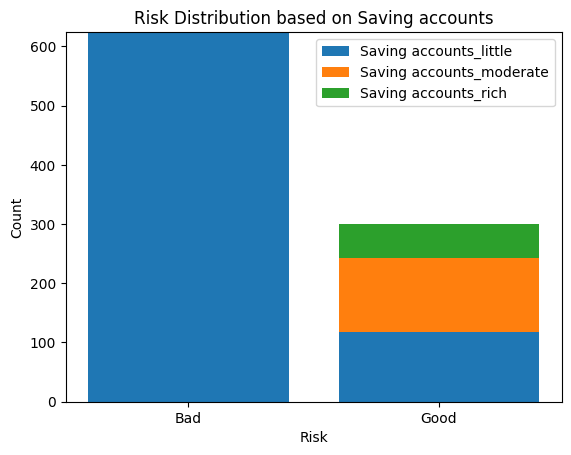

In [ ]:
import matplotlib.pyplot as plt

# Group the data by 'Risk' and count the occurrences for each 'Saving accounts' category
grouped_data = data.groupby('Risk')['Saving accounts_little', 'Saving accounts_moderate', 'Saving accounts_rich'].sum()

# Plot the stacked bar chart
x = grouped_data.index
y_little = grouped_data['Saving accounts_little']
y_moderate = grouped_data['Saving accounts_moderate']
y_rich = grouped_data['Saving accounts_rich']

plt.bar(x, y_little, label='Saving accounts_little')
plt.bar(x, y_moderate, bottom=y_little, label='Saving accounts_moderate')
plt.bar(x, y_rich, bottom=y_little + y_moderate, label='Saving accounts_rich')
plt.xlabel('Risk')
plt.ylabel('Count')
plt.title('Risk Distribution based on Saving accounts')
plt.legend()
plt.show()


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)





/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))



              precision    recall  f1-score   support

         Bad       0.79      0.99      0.88       123
        Good       0.98      0.57      0.72        77

    accuracy                           0.83       200
   macro avg       0.88      0.78      0.80       200
weighted avg       0.86      0.83      0.82       200

[[122   1]
 [ 33  44]]


In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.83
